In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from scipy import stats
from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt

In [37]:
path = r"C:\Users\Ammar\Downloads\oil_exxon.xlsx"

price_data = pd.read_excel(path)

# This will set my index to the date column:
price_data.index = pd.to_datetime(price_data["date"])
price_data = price_data.drop(["date"], axis = 1)

print(price_data.dtypes)

exon_price    float64
oil_price     float64
dtype: object


In [43]:
new_columns = {"exon_price": "exxon_price"}

price_data = price_data.rename(columns = new_columns)

price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [53]:
# check for missing values
display(price_data.isna().any())

# drop any missing values
price_data = price_data.dropna()

# let's check to make sure they've all been removed.
price_data.isna().any()

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

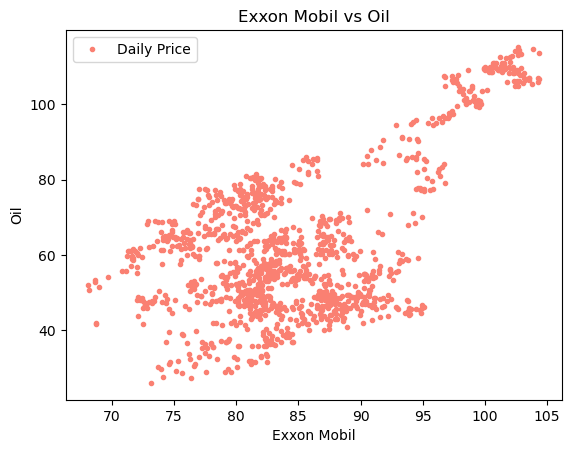

In [62]:
# create a scatterplot

#first define x and y variables

x = price_data ["exxon_price"]
y = price_data ["oil_price"]

plt.plot(x, y, ".", color = "salmon", label = "Daily Price")

plt.title("Exxon Mobil vs Oil")
plt.xlabel("Exxon Mobil")
plt.ylabel("Oil")
plt.legend()
plt.show()

At first glance, we can tell there is some type of relationship because the dots seem to be a tandem (which is a group of two
or more arranged behind the other or used by acting in conjunction).

In [65]:
print(price_data.corr())

             exxon_price  oil_price
exxon_price      1.00000    0.60132
oil_price        0.60132    1.00000


According to the given results, there is a strong positive correlation. Our Correlation benchmarks are:

Very strong relationship (|r|>0.8 =>)
Strong relationship (0.6≤|r|)
Moderate relationship (0.4≤|r|)
Weak relationship (0.2≤|r|)
Very weak relationship (r)

the correlation measure we have received is 0.60132, which is a strong relationship between the price 
of Exxon Mobil and the price of oil. 

In [68]:
print(price_data.describe())

       exxon_price    oil_price
count  1248.000000  1248.000000
mean     84.802796    61.935000
std       7.424687    19.288424
min      68.120003    26.010000
25%      80.190002    48.162500
50%      83.024998    57.120000
75%      88.529999    70.725000
max     104.379997   115.190000


Nothing stands out as a concern at this point, our range is healthy, and all the data falls within 3 Standard deviations of the mean. In other words, we do not seem to have any outliers that we need to worry with. They both have the same count so we look good there and we get a good idea of the min and max. Overall, we should be happy with the output.

[[<Axes: title={'center': 'exxon_price'}>
  <Axes: title={'center': 'oil_price'}>]]


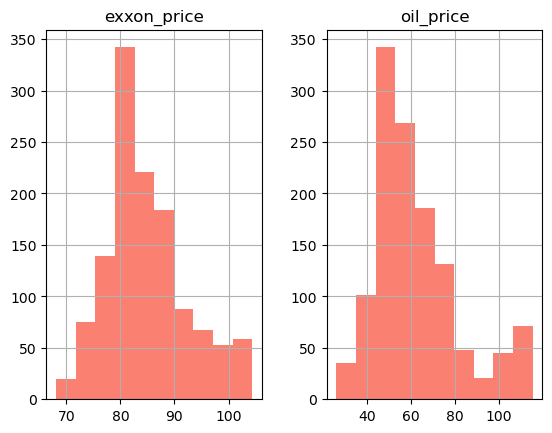

In [71]:
print(price_data.hist(grid = True, color = "salmon"))

At first glance, we can verify that there are no outliers, but we can tell that the shape of both variables are not symmetrical.
The shape of both variables are slightly skewed to the left. So, we should verify our interpretation from our measurements.

In [74]:
# calculate the excess kurtosis using the Fisher method. The alternative is Pearson which calculates regular kurtosis.
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

# calculate the skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis))  # this looks fine
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew))              # moderately skewed, it's a little high but we will accept it

'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

Kurtosis:
1. 
Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distributio2. n
Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broade3. r.
Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and shar
per.
Ske:wn1. ess

If skewness is less than −1 or greater than +1, the distribution is highly s2. kewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately 3. skewed.
If skewness is between −½ and +½, the distribution is approximately s


According to the given results, the kurtosis of Exxon Mobil and Oil are both mesokurtic due to the present values of 0.088 and 0.532. The values are around the value of 0 which indicates that the shape of data is normally distirbuted. On the other hand, the skewness of Exxon Mobil is 0.660 which indicates that the distribution is symmetric. However when it comes to the skewness of Oil, the skewness is 1.024 which indicates that the distribution is slightly positively skewed since it is larger than 1, but we are going to accept it.

But we are going to conduct further kurtosis and skewness testing.

therefore, our hypothesis testing are as follows:

alpha = 0.05
H0: Accept if the p-value isthan alpha.
H1: Accept if the p-value is larger than alpha.

if the data is larger than alpha then the data distrubuion is syymmetric.

In [77]:
print("Exxon")
print(stats.kurtosistest(price_data["exxon_price"]))
print("Oil")
print(stats.kurtosistest(price_data["oil_price"]))
print("Exxon")
print(stats.skewtest(price_data["exxon_price"]))
print("Oil")
print(stats.skewtest(price_data["oil_price"]))




Exxon
KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)
Oil
KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)
Exxon
SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)
Oil
SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159923e-35)


Looking at the given results above, we can verify that we will be rejecting the null hypothesis 3 out of 4 times because the
p-values are larger than alpha = 0.05. In addition, the Kurtosis of "Oil" is 3.194 which is larger than 3, indicating that
the kurtosis type is Leptokurtic which also indicates that the shape of the kurtosis has fatter tails and sharper peak than the normal distribution. Where as the kurtosis of "Exxon" is 0.719 which is less than the value of 3, indicating that the kurtosis type is Mesokurtic, meaning
that the distribution of the data is normal.

Looking at the skewness results on the other hand, shows us that the data of "Exxon" and "Oil" is highly skewed because their values respectively
are 8.770 and 12.471. The values are larger than 1, indicating that the distribution of the data for both "Exxon" and "Oil" are highly skewed
meaning that the tail of the distribution extends more to the right side of the mean.

Based on the visualization test of Exxon and Oil's Kurtosis and skewness, even with the data being slightly skewed or having mild kurtosis, this is why we always need to visualize the data and calculate the metrics before running these test.

Thus, we need to check for outliers and transform our data(for accuracy).

In [80]:
# Calculate z-scores for each numerical column in the DataFrame
z_scores = np.abs(stats.zscore(price_data))

# Set a threshold (e.g., 3)
threshold = 3

# Identify rows where any column has a z-score greater than the threshold
outliers = (z_scores > threshold).any(axis = 1)

# check for outliers
num_outliers = np.sum(outliers)
print(f"The total number of outliers that exist within rows are: {num_outliers}")

The total number of outliers that exist within rows are: 0


Section 5: Building our Model

In [83]:
# define our input variable (X) & output variable.
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression()

In [101]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print(f"Intercept B0: {intercept}")
print(f"Coefficient B1: {coefficient}")

Intercept B0: 84.72222224513172
Coefficient B1: 4.595631870017132


In [23]:
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0]
print(f"the predicted value of Exxon for a price of $67.33 of oil is: {prediction}")

the predicted value of Exxon for a price of $67.33 of oil is: [[371.60365036]]


In [24]:
#get multiple predictions
y_predict = regression_model.predict(X_test)

#show the first 5 predictions

y_predict[:5]

array([[82.84097254],
       [83.43274211],
       [82.14399949],
       [79.7769212 ],
       [84.48696864]])

6 - Evaluating our Model:

In [26]:
#define our output
X2 = sm.add_constant(X)

#Create an OLS (ordinary least squares) model
model = sm.OLS(Y, X2)

#fit the model

est = model.fit()

Confidence intervals:

First, let us calculate confidence intervals. Keep in mind that by default that the calculated using 95% intervals. We interpret this by saying if the population from which this sample was drawn was sampled 100 times. Approximately 95 of those confidence intervals would contain the "true" coefficient.

Why do we provide a confidence range? Well, it comes from the fact that we only have a sample of the population, not the entire population itself. Because of this concept, means that the "true" coefficient could exist in the interval below or it couldn't, but we cannot say for sure. We provide some uncertainty by providing a range, usually 95% interval, where the coefficient is probably in.

In [29]:
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


Interpreting the output above, we would say that with 95% confidence the oil_price coefficient exists between 0.214 & 0.248.

Want a narrower range? Decrease your confidence.
Want a wider range? Increase your confidence.

:Hypothesis Testing:

Null Hypothesis: There is no relationship between the price of oil and the price of Exxon.

The coefficient equals 0.
Alternative Hypothesis: There is a relationship between the price of oil and the price of Exxon.

The coefficient does not equal to 0.
If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0.

If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.

In [32]:
#estimate the p-values

est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. In this case, the p-value for the oil_price coefficient is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship and that we believe it to be between oil and the price of Exxon.